<a href="https://colab.research.google.com/github/JackMAlucard/Data-Scientist-Technical-Assessment/blob/main/ta_fake_real_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1️⃣ Data Cleaning and Preprocessing

##💾 Loading the text dataset and inspecting its structure

###Setting up the Kaggle API to import the datasets directly from Kaggle
**Setting up the Kaggle API to import the datasets directly from Kaggle**

In [1]:
# Upload Kaggle API Credentials, downloaded from https://www.kaggle.com/settings
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jackmalucard","key":"2aa4618ce05c77e80b6f52fc895aa216"}'}

In [2]:
# Move Kaggle API Credentials
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
# Set Permissions
!chmod 600 ~/.kaggle/kaggle.json

###Downloading dataset from Kaggle

In [3]:
# Download dataset directly using the Kaggle API
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset/
!ls

 61% 25.0M/41.0M [00:00<00:00, 126MB/s] 
100% 41.0M/41.0M [00:00<00:00, 149MB/s]
fake-and-real-news-dataset.zip	sample_data


###Extracting dataset from zip file into the ```/content``` directory.

In [4]:
# Import 'zipfile' module
import zipfile

# Specify the path to the zip file with the dataset
zip_file_path = 'fake-and-real-news-dataset.zip'

# Specify the directory where the files are to be extracted
extract_dir = '/content'

# Extract the files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

!ls

fake-and-real-news-dataset.zip	Fake.csv  sample_data  True.csv


Getting the names of the files inside the dataset to be used later

In [5]:
import os

# Specify the directory path
directory_path = '/content'

# Specify the desired file extension
extension = '.csv'

# Get a list of file names in the directory
file_names = os.listdir(directory_path)

# Filter and save filenames with the desired extension
filtered_files = [file_name for file_name in file_names if file_name.endswith(extension)]

# Print the list of file names
print("List of file names in the directory:")
for file_name in filtered_files:
    print(file_name)

List of file names in the directory:
Fake.csv
True.csv


###Loading and inspecting data

In [6]:
# Import pandas library
import pandas as pd

In [7]:
# Load the dataset files into Pandas DataFrames
df1 = pd.read_csv(filtered_files[0])
df2 = pd.read_csv(filtered_files[1])

In [8]:
# Fake News Dataset (df1)
# Get basic information about df1
print("Fake News dataframe info:")
print(df1.info())
print("\n")

# Display the first few rows of df1
print("First few rows of Fake News DataFrame:")
print(df1.head())

Fake News dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


First few rows of Fake News DataFrame:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was reveal

In [9]:
# Real News Dataset (df2)
# Get basic information about df2
print("Real News dataframe info:")
print(df2.info())
print("\n")

# Display the first few rows of df2
print("First few rows of Real News DataFrame:")
print(df2.head())

Real News dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


First few rows of Real News DataFrame:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHIN

**Observations on the datasets based on their structure**

After loading the two datasets into dataframes, and inspecting them by printing its basic properties and its first few rows, it can be determined that the datasets consist of:
- 4 data columns
- The rows of each column contain text
- The columns contain the following information for each news article:
  1. title
  2. text
  3. subject
  4. date

Thus far, it could be said that the most relevant text information that can be used to classify each news article would be contained in the *title* and *text* columns.

The specific *date* information *may* be irrelevant for the classification if the articles are all pulled from the same relatively short time frame.

The *subject* column may contain similar or repeated subjects.

The Kaggle page for this dataset somewhat confirms the last two paragraphs. The time frame for the Fake News set is 30-Mar-15 to 18-Feb-18, while for the Real News set it is 12-Jan-16 to 30-Dec-17. 68% of the subjects for the Fake News set is made up of the generic 'News' and 'Politics' subjects, while the Real News set is entirely made up of the subjects 'politicsNews' and 'worldNews'.

The ```info``` method of the pandas library indicates that there are no missing values on either set. The Kaggle page however indicates that 3% of the data from the Fake News set is empty.

##🚫 Handle missing values in text data if *present*

Considering the information from the Kaggle page, that there are certain *empty* text rows on the datasets, we check this fact in order to later drop the necessary empty rows from the dataframes.

In [10]:
# Iterate through the column dataframes, and then through the title and text
# columns to count how many have empty space values
for dataframe in (df1, df2):
  for column in ('title', 'text'):
    empty_space_count = 0
    for value in dataframe[column]:
      if value.isspace(): empty_space_count += 1
    print(f"Number of values filled with empty spaces in: {empty_space_count}")

Number of values filled with empty spaces in: 0
Number of values filled with empty spaces in: 630
Number of values filled with empty spaces in: 0
Number of values filled with empty spaces in: 1


The previous code block indicates that, as a whole, there are several text rows in the *text* columns. We will drop these rows before we continue with text preprocessing

In [11]:
# Drop rows with strings filled with empty spaces (whitespace)
df1 = df1[df1.applymap(lambda x: not isinstance(x, str) or x.strip() != '').all(axis=1)]
df2 = df2[df2.applymap(lambda x: not isinstance(x, str) or x.strip() != '').all(axis=1)]

# Print new dataframes info and check for empty spaces again
for dataframe in (df1, df2):
  print(dataframe.info())
  for column in ('title', 'text'):
    empty_space_count = 0
    for value in dataframe[column]:
      if value.isspace(): empty_space_count += 1
    print(f"Number of values filled with empty spaces in: {empty_space_count}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22851 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    22851 non-null  object
 1   text     22851 non-null  object
 2   subject  22851 non-null  object
 3   date     22851 non-null  object
dtypes: object(4)
memory usage: 892.6+ KB
None
Number of values filled with empty spaces in: 0
Number of values filled with empty spaces in: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21416 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 836.6+ KB
None
Number of values filled with empty spaces in: 0
Number of values filled with empty spaces in: 0


##🔄 Perform text preprocessing steps

**Considerations before preprocessing**

Before performing text preprocessing, the two sets will be unified into a single dataset with the following columns: title, text, label (0 fake, 1 real). With the added label column, a first step in the preprocessing task, Encoding Categorical Labels, is already achieved.

The subject column has been dropped with the working assumption that due to the apparent uniformity in the subjects, these categorization of the news will not be significantly relevant to the classification task.

The date column has been dropped since, even though it could also be used to classify these kind of news by pattern seeking in the distribution of the dates, it is not relevant for classification at an NLP level.

###Merging datasets, dropping subject and date columns, adding label and category column

In [24]:
# Merge the DataFrames, selecting specific columns
df = pd.concat([df1[['title', 'text']], df2[['title', 'text']]])

# Add a new column to indicate the source (0 for Fake News df1, 1 for Real News df2)
df['category'] = ['Fake'] * len(df1) + ['Real'] * len(df2)
df['label'] = [0] * len(df1) + [1] * len(df2)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Printing new merged dataframe info
print(df.info())
#print(df.head())
#print(df.tail())
print('\n')

# Change data type of 'label' column from int64 to int32
df['label'] = df['label'].astype('int32')

# Randomly reorder the rows
df = df.sample(frac=1).reset_index(drop=True)
# Printing new merged dataframe info
print(df.info())
#print(df.head())
#print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44267 entries, 0 to 44266
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44267 non-null  object
 1   text      44267 non-null  object
 2   category  44267 non-null  object
 3   label     44267 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44267 entries, 0 to 44266
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44267 non-null  object
 1   text      44267 non-null  object
 2   category  44267 non-null  object
 3   label     44267 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 1.2+ MB
None


###Applying basic preprocessing techniques in order to first visualize the raw data

Importing libaries to be used and define basic preprocessing techniques functions

In [28]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#Not used yet, for visualization techniques
from wordcloud import WordCloud
from nltk import FreqDist
import matplotlib.pyplot as plt

# Initialize NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Defining preprocessing techniques

In [31]:
# Basic preprocessing techniques
def text_preprocessing(text):
    # Lowercase the text
    text = text.lower()

    # Remove leading/trailing whitespaces
    text = text.strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation and stop words
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Stemming
    #stemmer = PorterStemmer()
    #tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    #lemmatizer = WordNetLemmatizer()
    #tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin the tokens into a cleaned text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

Applying basic preprocessing to datasets

In [32]:
# Apply text preprocessing to dataset
df['clean_text'] = df['text'].apply(text_preprocessing)

# Apply basic preprocessing to datasets
#df['clean_text'] = df['text'].apply(basic_preprocessing)
#df1['clean_text'] = df1['text'].apply(basic_preprocessing)
#df2['clean_text'] = df2['text'].apply(basic_preprocessing)

# Combine cleaned text from datasets
# all_text = ' '.join(df['clean_text']) + ' '

KeyboardInterrupt: ignored

### (to be removed) **Raw Text Data visualization**

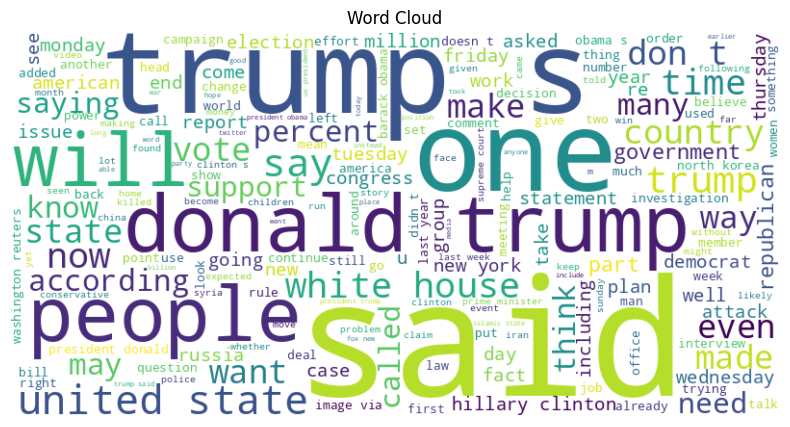

In [16]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

Tokenization

In [19]:
# Tokenize the text for frequency distribution and document length distribution
tokens = nltk.word_tokenize(all_text)

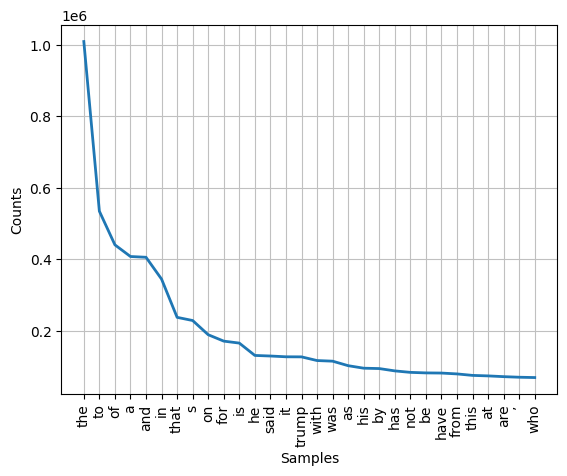

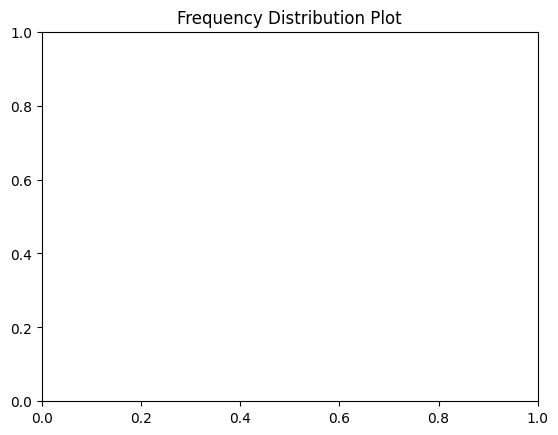

In [20]:
# Frequency Distribution Plot
freq_dist = FreqDist(tokens)
freq_dist.plot(30, cumulative=False)
plt.title('Frequency Distribution Plot')
plt.show()

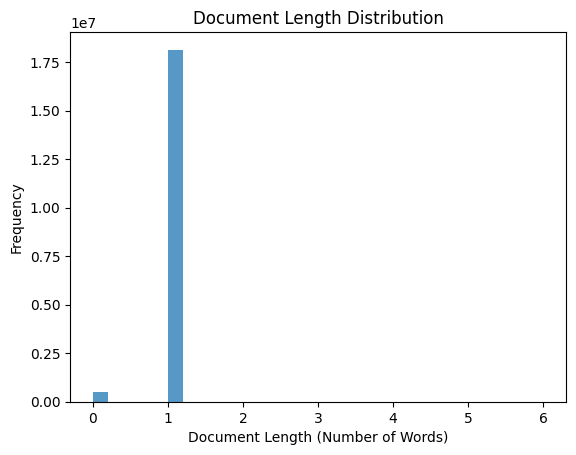

In [22]:
# Document Length Distribution Histogram
document_lengths = [len(doc.split()) for doc in all_text.split(' ')]
plt.hist(document_lengths, bins=30, alpha=0.75)
plt.xlabel('Document Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Document Length Distribution')
plt.show()

##✨ Provide a clean, preprocessed text dataset with extensive documentation

The processed dataset is con

In [ ]:
#Code

#2️⃣ Text Analysis and Feature Extraction

Text

##📝 Conduct text analysis to gain insights from the text data

Text

In [ ]:
#Code

##🛰️ Extract advanced features from text data

Text

In [ ]:
#Code

##📊 Visualize and explore text data patterns using advanced NLP visualization

Text

In [ ]:
#Code

#3️⃣ Predictive Modeling with NLP

Text

##✂️ Split the text dataset into training, validation, and testing sets

Text

In [ ]:
#Code

##📈 Choose and implement an NLP model to handle the text data

Text

##🤖 Select an algorithm that best suits the needs of this assessment

Text

In [ ]:
#Code

##🏃‍♂️ Train the model on the training set

Text

In [ ]:
#Code

##📝 Evaluate the model on the validation set

Text

#4️⃣ Model Interpretation

Text

##👨‍💻 Interpret complex text model predictions

Text

In [ ]:
#Code

##🧑‍🚀 Explore the model's sensitivity

Text

In [ ]:
#Code

##🧑‍🏫 Discuss the model's robustness

Text

In [ ]:
#Code